# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This movie data set includes data about individual movies and their performance. I plan on analyzing the trends that make a successful movie.
The questions that will be explored are:
- What are the top 10 most popular movies?
- What are the top 10 most profitable movies?
- What is the average movie runtime?
- What is the correlation between budget, runtime, popularity and profit?


Imports for the project

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Function that sorts the dataframe by a column and returns a specified number of rows

In [48]:
def sorted_rows(df, column, number):
    return df.sort_values(by = column, ascending = True).tail(number)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loading the data set and viewing the top 5 rows

In [49]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking the size of the dataset

In [50]:
df.shape

(10866, 21)

Exploring the dataset further

In [51]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Checking for null values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning - dropping columns

There are 10866 rows in this dataset. Some columns have missing values. Every column I will need has no null values, therefore the only cleaning I will need to do is dropping unused columns from the dataframe.

In [54]:
df.drop(['id','imdb_id','budget','revenue','cast','homepage','director','tagline','keywords','overview','genres','production_companies','release_date','vote_count','vote_average','release_year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   budget_adj      10866 non-null  float64
 4   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 424.6+ KB


My dataset is all cleaned up, now it's time to explore it.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What are the top 10 most popular movies?

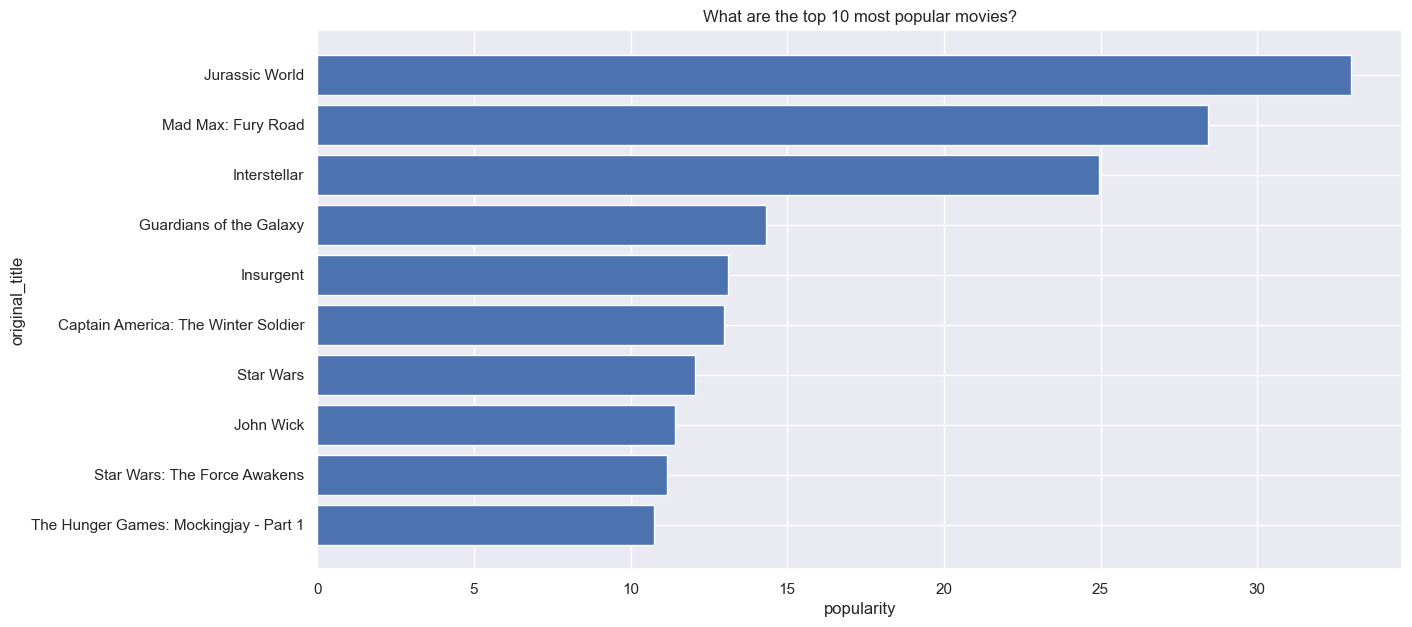

In [55]:
top_10 = sorted_rows(df, 'popularity', 10)
plt.figure(figsize=(14,7), dpi = 100)
plt.barh(top_10.original_title, top_10.popularity)
plt.xlabel('popularity')
plt.ylabel('original_title')
plt.title('What are the top 10 most popular movies?')
plt.grid(True)
plt.show()

The results are interesting. Some movies were predictable, others were surprising.

### Research Question 2 - What are the top 10 most profitable movies?

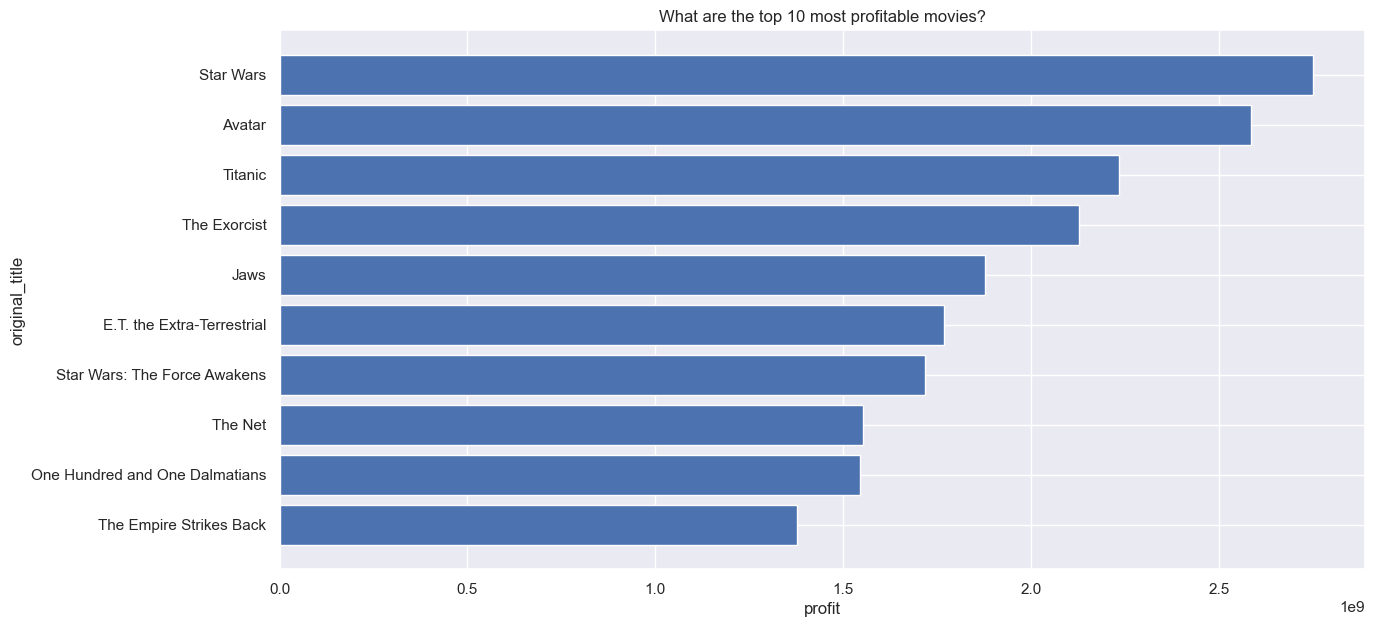

In [56]:
df['profit'] = df.revenue_adj - df.budget_adj
top_10 = sorted_rows(df, 'profit', 10)
plt.figure(figsize=(14,7), dpi = 100)
plt.barh(top_10.original_title, top_10.profit)
plt.xlabel('profit')
plt.ylabel('original_title')
plt.title('What are the top 10 most profitable movies?')
plt.grid(True)
plt.show()

Star Wars is the only movie in the top 10 most profitable and top 10 more popular.

#### Research Question 3- What is the average movie runtime?

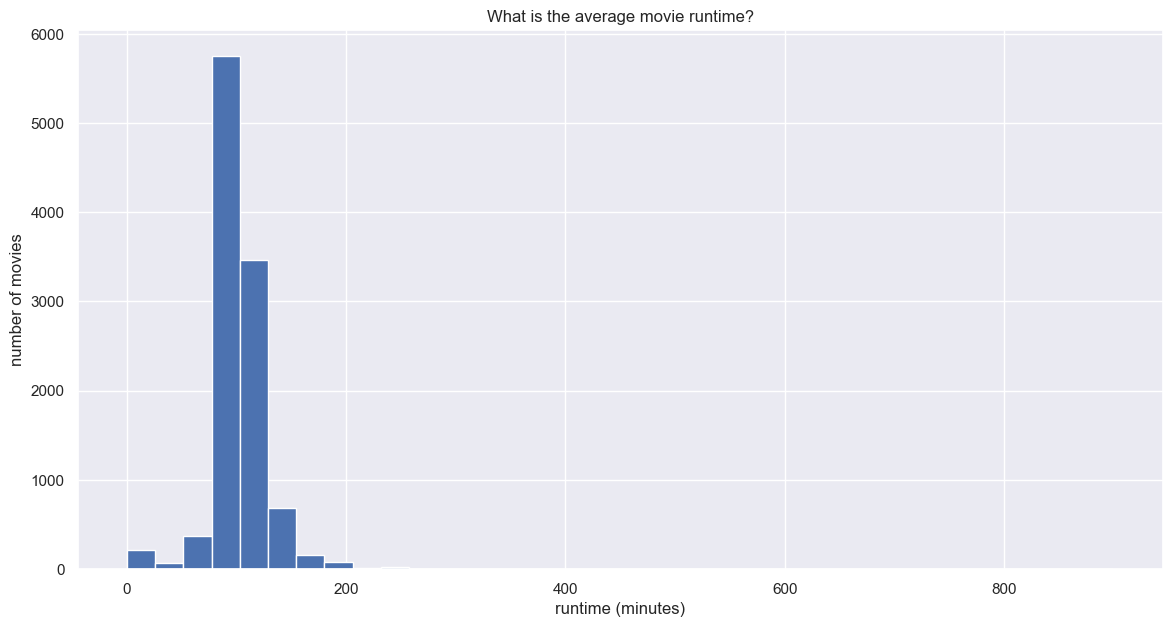

In [57]:
plt.figure(figsize=(14,7), dpi = 100)
plt.hist(df.runtime, bins=35)
plt.xlabel('runtime (minutes)')
plt.ylabel('number of movies')
plt.title('What is the average movie runtime?')
plt.grid(True)
plt.show()

Since most of the runtimes are below 200 minutes, we can adjust the range to get a better idea of the average.

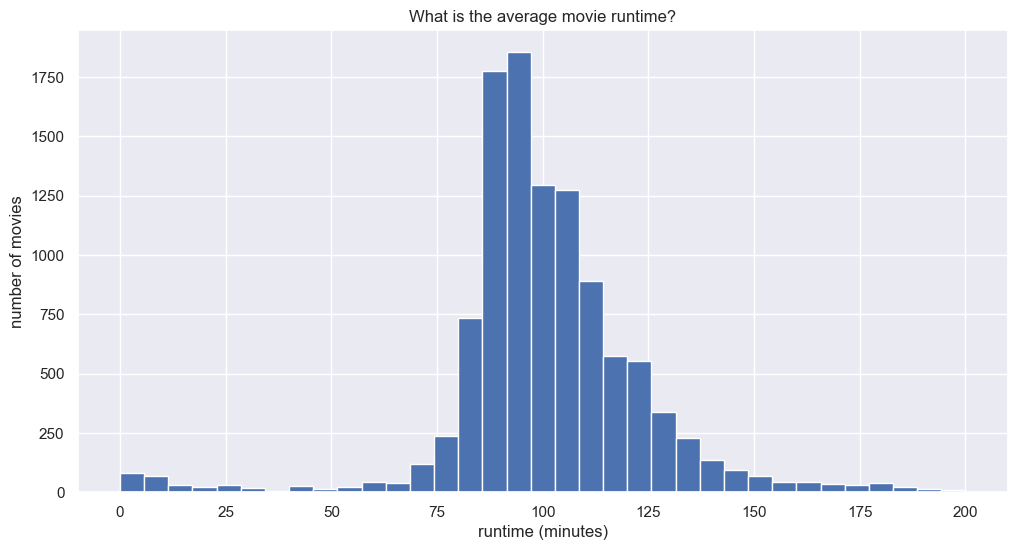

In [58]:
plt.figure(figsize=(12,6), dpi = 100)
plt.hist(df.runtime, bins=35, range=(0, 200))
plt.xlabel('runtime (minutes)')
plt.ylabel('number of movies')
plt.title('What is the average movie runtime?')
plt.grid(True)
plt.show()

We have a better idea but it's still hard to tell the average runtime exactly. We can use numpy to find the average.

In [59]:
np.mean(df.runtime)

102.07086324314375

The average runtime is 102 minutes

#### Research Question 4- What is the correlation between popularity, runtime, budget_adj, revenue_adj and profit?

<Axes: >

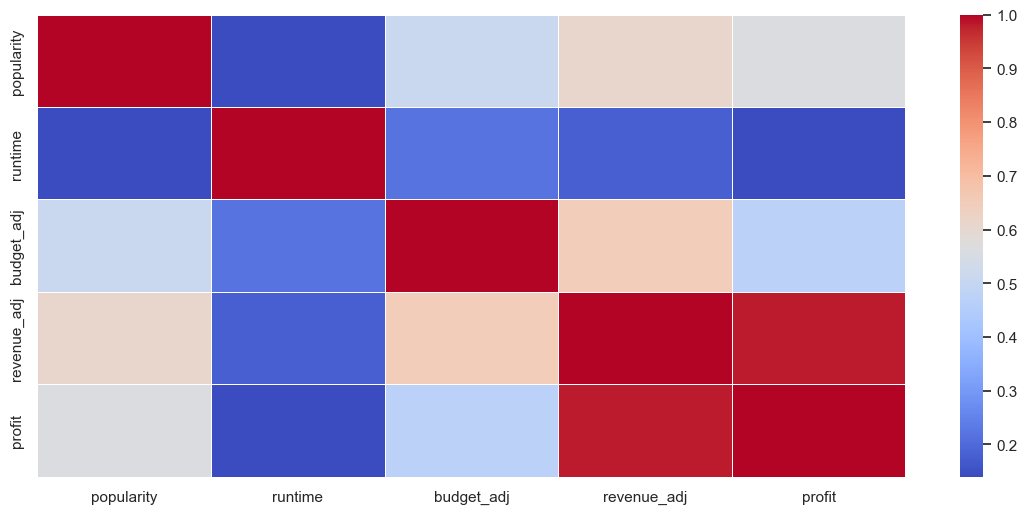

In [60]:
df_numeric = df.select_dtypes(include='number')
corr = round(df_numeric.corr(), 2)
sns.set(rc={'figure.figsize': (14,6)})
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Some takeaways from this visual:
- revenue_adj and profit have a strong correlation.

- budget_adj correlates a bit with revenue_adj.

- budget_adj doesn't correlate too much with profit or popularity.

- Runtime doesn't seem to correlate at all. 

<a id='conclusions'></a>
## Conclusions

As a result of exploring this dataset, we have found:
- The top 10 most popular movies
- The top 10 most profitable movies
- The average runtime
- The correlation between popularity, runtime, budget_adj, revenue_adj and profit

Limitations
- The size of the dataset limits us from truly knowing the answers regarding every movie.
- The range of the release years limit us since popularity and runtime can be correlated with the year.